## Uber Movement Data: Hourly Aggregate on Weekends Q1 2018

### 1. Read Data

In [2]:
import pandas as pd
# Read Data
uber_df = pd.read_csv('/home/zack/Uber_Weekend_Hourly_Aggregate/OnlyWeekends-HourlyAggregate.csv')

# print first 3 rows
uber_df.head(3)



,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,282,169,10,1623.83,326.12,1591.79,1.22
1,399,345,14,537.89,104.73,529.11,1.19
2,151,70,0,783.25,380.54,714.42,1.50


### 2. Find Routes that have the highest Mean Travel time. 

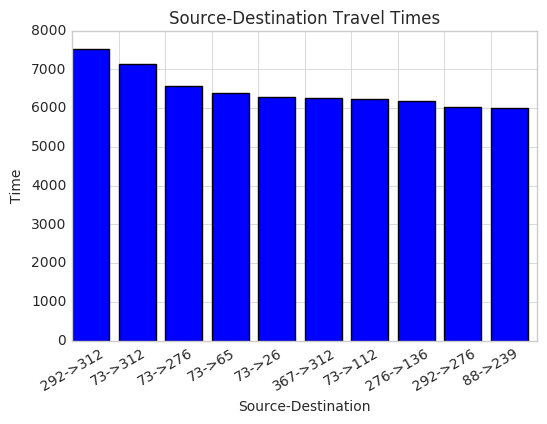

In [24]:
# Join sourceid - dstid to create source-dest col
uber_df['source_dest'] = uber_df['sourceid'].map(str) +'->'+ uber_df['dstid'].map(str)

# Return a df with the 10 largest mean_travel_time
largest_uber_df = uber_df.nlargest(10, 'mean_travel_time')


# Plot Bar graph to represent the 10 largest travel times
import matplotlib.pyplot as plt 
import numpy as np

y_pos = np.arange(len(largest_uber_df['source_dest']))

plt.bar(y_pos, largest_uber_df['mean_travel_time'])
plt.xticks(y_pos, largest_uber_df['source_dest'] , rotation=30)
plt.xlabel('Source-Destination', fontsize=10)
plt.ylabel('Time', fontsize=10)
plt.title('Source-Destination Travel Times')
plt.show()

### 3. Time of Day for Routes with Highest Travel Times

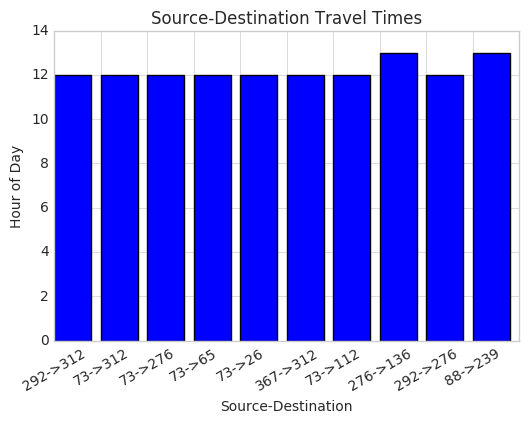

In [25]:
y_pos = np.arange(len(largest_uber_df['source_dest']))

plt.bar(y_pos, largest_uber_df['hod'])
plt.xticks(y_pos, largest_uber_df['source_dest'] , rotation=30)
plt.xlabel('Source-Destination', fontsize=10)
plt.ylabel('Hour of Day', fontsize=10)
plt.title('Source-Destination Travel Times')
plt.show()

### 4. Notes

1. Seems like Travel from Route 73 will likely result in high Travel time over the weekends. 
2. Over the weekends, Midday seems to be the busiest time of the day,with passengers experiencing high Travel Times.